# Coupled Model Plots

In [1]:
import model
import pickle
import numpy as np
import pandas as pd
import os
%matplotlib inline

In [2]:
prep_data = model.data_and_network_prep()

In [3]:
data_for_fit_i = model.create_data_for_fit_influenza()
data_for_fit_v = model.create_data_for_fit(prep_data)

Load results

In [25]:
# Get list of files
# path = 'L:/Dor/Data/coupled_model/model_results'
path = 'L:/Dor/Data/coupled_model/model_results_correction'
file_names = os.listdir(path)#[:-1]

# Merge lists
model_results_all = []
for file_name in file_names:
    with open(f'{path}/{file_name}', 'rb') as pickle_in:
        cur_res = pickle.load(pickle_in)
    model_results_all.extend(cur_res)

In [26]:
len(model_results_all)

200

Get model results lists

In [27]:
model_results_list = [res['model_results'] for res in model_results_all]

Get likelihood lists by season

In [28]:
likelihood_lists = {season: [] for season in model.seasons}
for res in model_results_all:
    for season, likelihood in res['likelihood_by_season'].items():
        likelihood_lists[season].append(likelihood)

In [29]:
{s: likelihood_lists[s][np.argsort(likelihood_lists[s])[len(likelihood_lists[s])//2]] for s in model.seasons}

{2011: 24858.303657981378,
 2012: 5816.266234935706,
 2013: 19983.411130816457,
 2014: 13110.663418829476,
 2015: 12822.419739058776,
 2016: 22522.927194221116,
 2017: 10764.035437461083}

In [17]:
{s: likelihood_lists[s][np.argmax(likelihood_lists[s])] for s in model.seasons}

{2011: 26640.80307306186,
 2012: 7916.153061808165,
 2013: 22044.88874353631,
 2014: 15121.102744408108,
 2015: 14837.697415653673,
 2016: 24082.69287150356,
 2017: 12012.649513877903}

In [ ]:
{2011: 25680.30347994885,
 2012: 6802.081990843844,
 2013: 20692.573126474173,
 2014: 14330.364836244316,
 2015: 13368.259347393756,
 2016: 23606.825638159233,
 2017: 11182.21193947767}

## Plots

### Aggregated with cloud

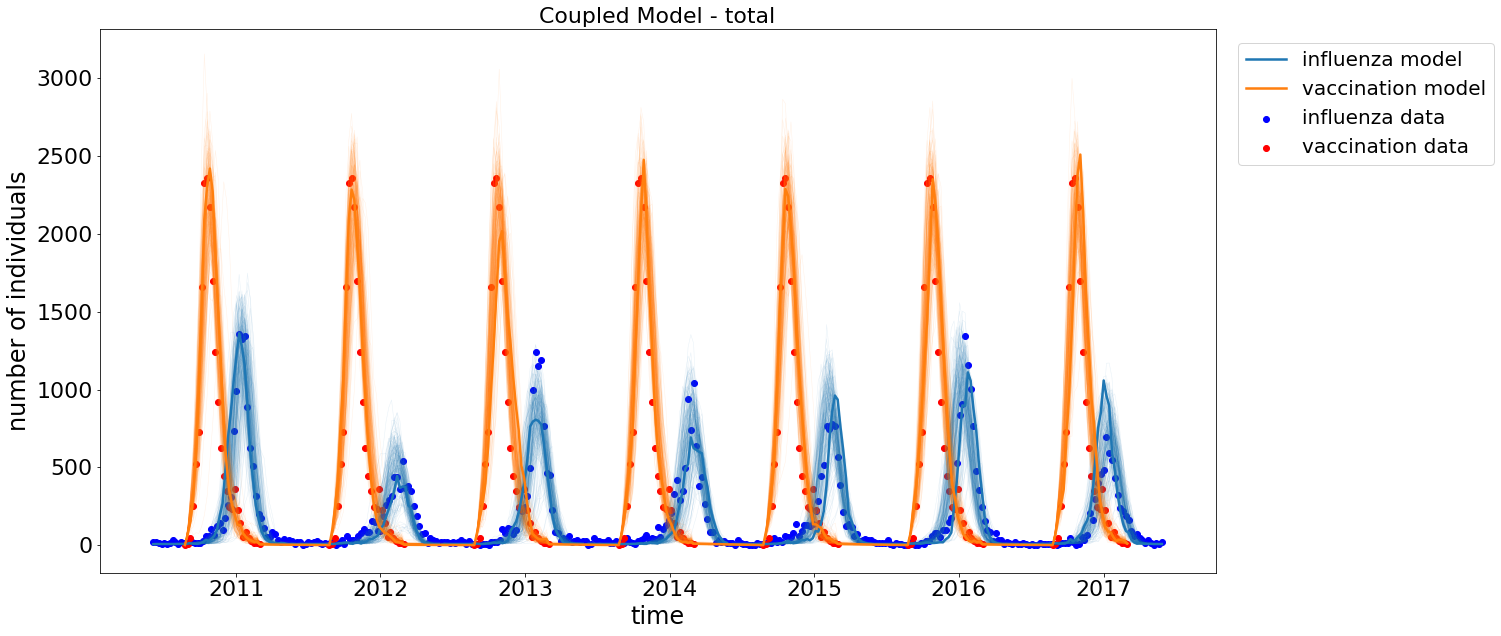

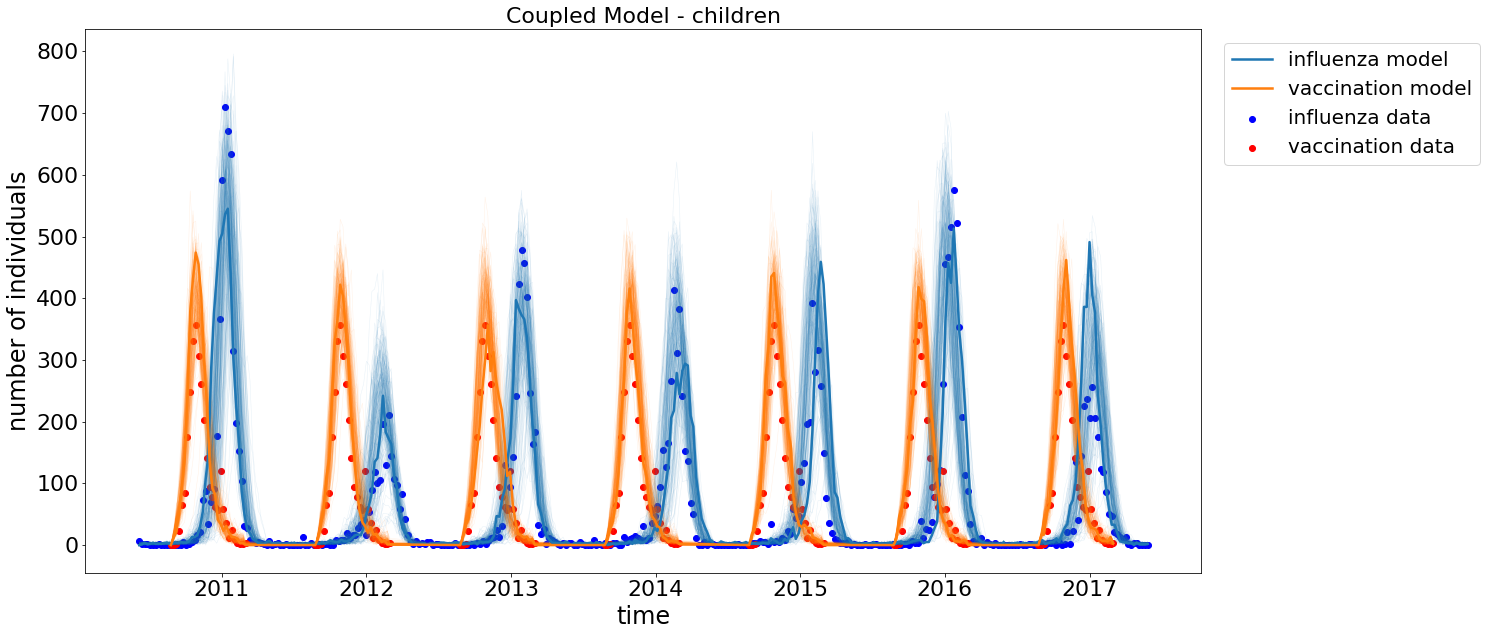

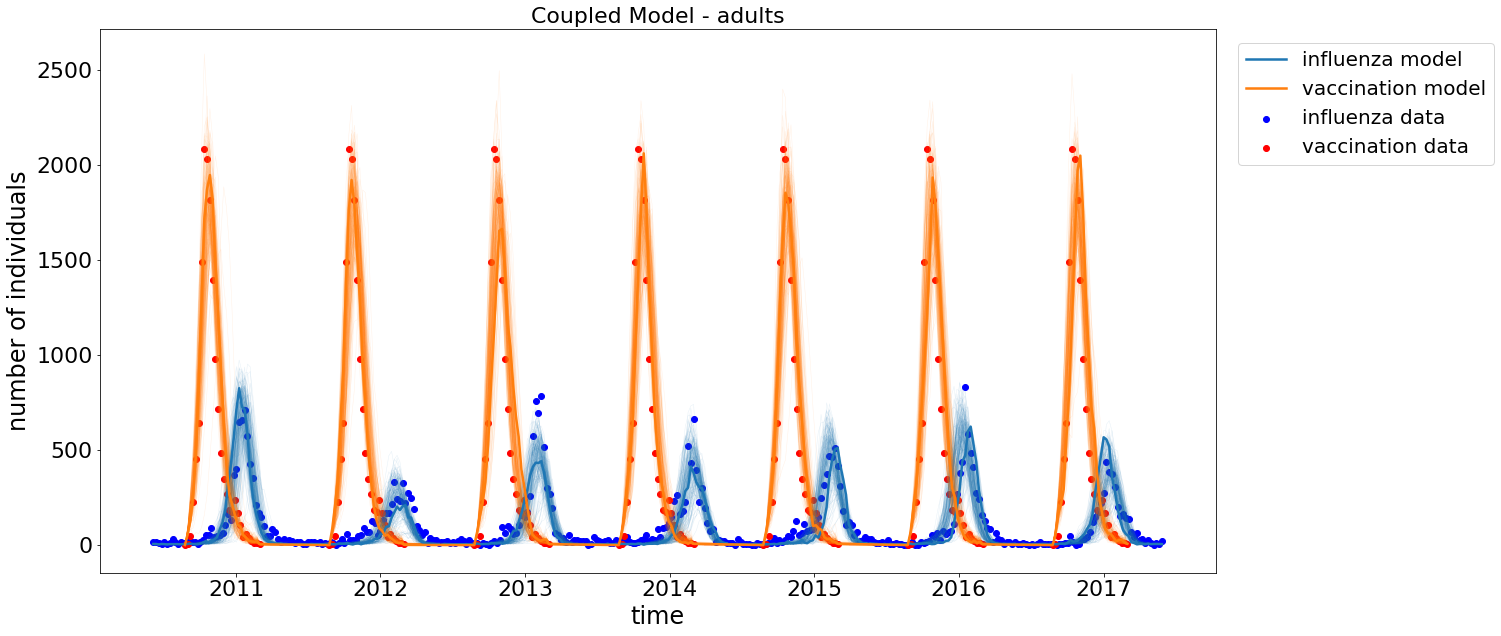

In [30]:
model.plot_aggregated_fit_coupled_with_cloud(model_results_list, likelihood_lists, data_for_fit_i, data_for_fit_v, prep_data)
model.plot_aggregated_fit_coupled_with_cloud(model_results_list, likelihood_lists, data_for_fit_i, data_for_fit_v, prep_data, age=0)
model.plot_aggregated_fit_coupled_with_cloud(model_results_list, likelihood_lists, data_for_fit_i, data_for_fit_v, prep_data, age=1)

### By subdist with cloud

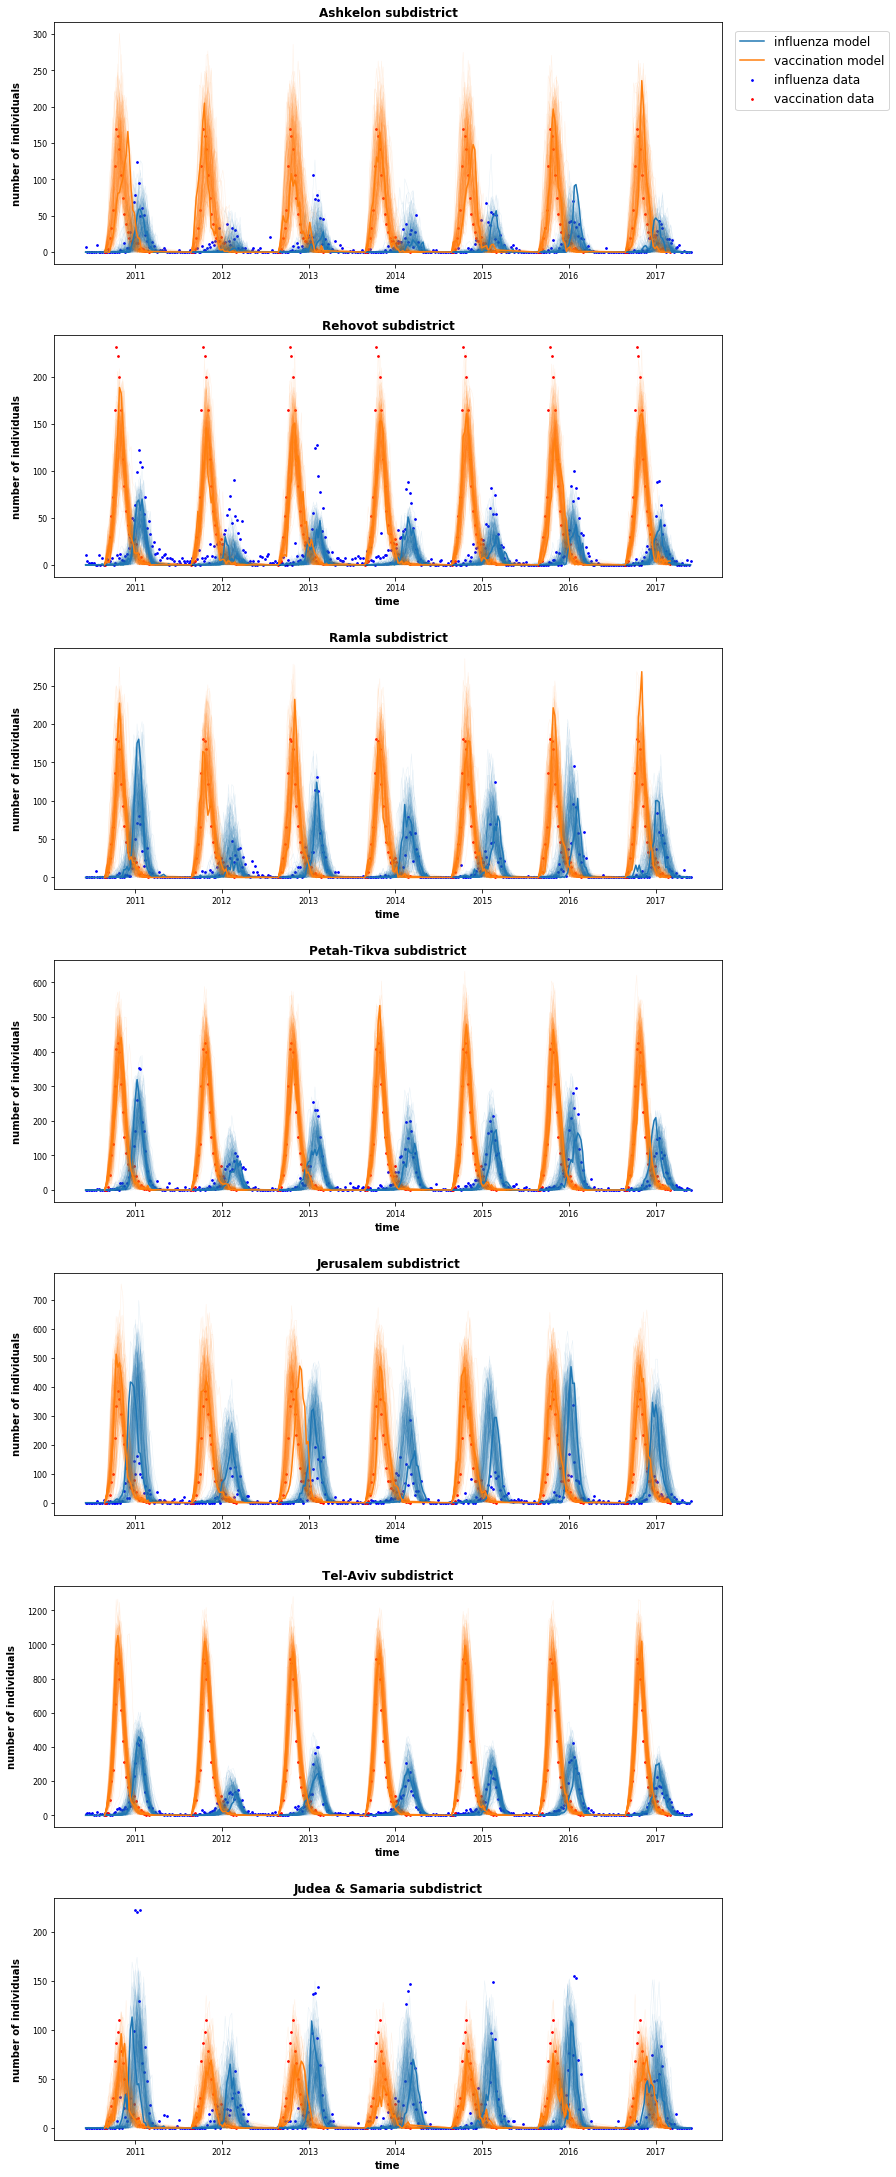

In [31]:
model.plot_fit_by_subdist_coupled_with_cloud(model_results_list, likelihood_lists, data_for_fit_i, data_for_fit_v, prep_data)

In [ ]:
# from matplotlib import pyplot as plt
# seasons = model.seasons
# get_model_weekly_cases_all_seasons = model.get_model_weekly_cases_all_seasons
# get_coupled_model_weekly_vacc_all_seasons = model.get_coupled_model_weekly_vacc_all_seasons
# get_model_weekly_cases = model.get_model_weekly_cases
# get_coupled_model_weekly_vacc = model.get_coupled_model_weekly_vacc